In [29]:
import os 
import zipfile
import json
import fiftyone as fo
from pylabel import importer
from pycocotools.coco import COCO
import requests
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [57]:
f = open('/home/theubuntu/Robot_Data_Hichem/dataset/annotations/train.json')


In [58]:
f2 = open('/home/theubuntu/Robot_Data_Hichem/dataset/annotations/test.json')

In [59]:
data = json.load(f)

In [60]:
data2 = json.load(f2)

In [61]:
for image in data2['images']:
    data['images'].append(image)

In [62]:
for anno in data2['annotations']:
    data['annotations'].append(anno)

In [63]:
for i in data['images']:
    filename=i["file_name"]
    filename_new=filename+".jpg"
    i["file_name"]=filename_new

In [64]:
for i in data['categories']:
    if (i["id"]==4):
        i["id"]=0
for a in data['annotations']:
    if (a["category_id"]==4):
        a["category_id"]=0       

In [65]:
data['annotations'][1000]

{'area': 162198.49309831043,
 'bbox': [222.93411254882812,
  -43.542137145996094,
  292.86659240722656,
  553.8306427001953],
 'category_id': 2,
 'id': 7105,
 'image_id': 7105,
 'iscrowd': 0,
 'keypoints': [[369.3674087524414, 233.37318420410156, 2],
  [229.17455673217773, 410.5876922607422, 2],
  [222.93411254882812, 31.311092376708984, 2],
  [415.45867919921875, 396.0215091705322, 2],
  [421.56688690185547, 41.86820983886719, 2],
  [239.02679443359375, 510.2885055541992, 1],
  [230.75334548950195, -43.542137145996094, 1],
  [499.2924118041992, 480.8430290222168, 1],
  [515.8007049560547, -20.951786041259766, 1]],
 'num_keypoints': 9,
 'segmentation': []}

In [66]:
for i in data['categories']:
    print(i)

{'id': 2, 'name': 'tiago'}
{'id': 3, 'name': 'pepper'}
{'id': 0, 'name': 'kuka'}


In [88]:
with open("/home/theubuntu/Robot_Data_Hichem/dataset/labels.json", "w") as outfile:
    json.dump(data, outfile)

In [80]:
xx = open("/home/theubuntu/Robot_Data_Hichem/dataset/labels.json")
datax = json.load(xx)

In [89]:


path_to_annotations = "/home/theubuntu/Robot_Data_Hichem/dataset/labels.json"
path_to_images = "/home/theubuntu/Robot_Data_Hichem/dataset/data/"


dataset_Robot = importer.ImportCoco(path_to_annotations, path_to_images=" ", name="BCCD_coco")


In [90]:
dataset_Robot.df.head(100)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,,000552.jpg,,552,640,480,,,174.281864,117.938032,...,[],0,,,,3,pepper,,,1
1,,006287.jpg,,6287,640,480,,,218.553677,12.759104,...,[],0,,,,2,tiago,,,1
2,,006942.jpg,,6942,640,480,,,271.320896,103.860826,...,[],0,,,,2,tiago,,,1
3,,000882.jpg,,882,640,480,,,272.219353,122.877302,...,[],0,,,,3,pepper,,,1
4,,000582.jpg,,582,640,480,,,221.979141,163.748674,...,[],0,,,,3,pepper,,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,,006805.jpg,,6805,640,480,,,244.581757,136.284857,...,[],0,,,,2,tiago,,,1
96,,004296.jpg,,4296,640,480,,,184.791374,256.664572,...,[],0,,,,0,kuka,,,1
97,,003459.jpg,,3459,640,480,,,227.289200,250.405254,...,[],0,,,,0,kuka,,,1


In [91]:


print(f"Number of images: {dataset_Robot.analyze.num_images}")
print(f"Number of classes: {dataset_Robot.analyze.num_classes}")

Number of images: 7500
Number of classes: 3


In [92]:
os.chdir ("/home/theubuntu/yolov5/datasets/Dataset_Robots_Humans/labels")


In [93]:
ls

all/


In [96]:
dataset_Robot.path_to_annotations = "/labels/"
dataset_Robot.export.ExportToYoloV5()[0]


'training/dataset.yaml'

In [97]:
path_labels="/home/theubuntu/yolov5/datasets/Dataset_Robots_Humans/labels/training/labels/"
destination_path_labels="/home/theubuntu/yolov5/datasets/Dataset_Robots_Humans/labels/all" #moves labesl
src_labels = os.listdir(path_labels)
for label_name in src_labels:
    full_path_file= os.path.join(path_labels, label_name)
    if os.path.isfile(full_path_file):
        shutil.copy(full_path_file, destination_path_labels)
        

In [98]:
shutil.rmtree("/home/theubuntu/yolov5/datasets/Dataset_Robots_Humans/labels/training")#Removes old folder with labels

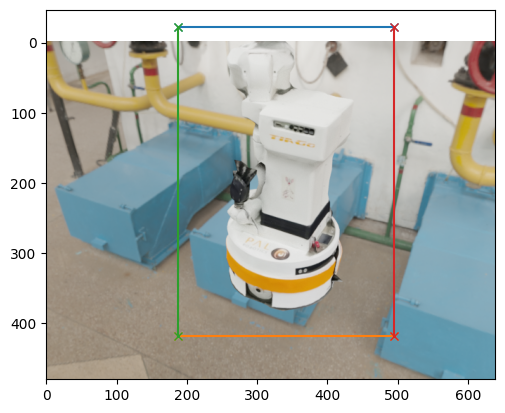